In [2]:
# Dependencies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
file = 'Motor_Vehicle_Crashes_modified.csv'

In [4]:
motor_vehicle_df = pd.read_csv(file, encoding="ISO-8859-1")


In [5]:
motor_vehicle_df.head()
#motorvehicle_df.head()

,Year,Vehicle Body Type,Action Prior to Accident,Type / Axles of Truck or Bus,Vehicle Year,State of Registration,Vehicle Make,Contributing Factor 1,Contributing Factor 1 Description,Contributing Factor 2,Contributing Factor 2 Description,Event Type,Unnamed: 12
0,2016,SUBURBAN,Changing Lanes,Not Entered,2012.0,NY,MINI,HUMAN,Unsafe Lane Changing,HUMAN,Not Applicable,Not Applicable,NaN
1,2016,PICKUP TRUCK,Going Straight Ahead,Not Entered,2014.0,NY,CHEVR,ENVMT,Pavement Slippery,HUMAN,Not Applicable,Not Applicable,NaN
2,2016,4 DOOR SEDAN,Going Straight Ahead,Not Entered,2007.0,NY,HONDA,ENVMT,Pavement Slippery,HUMAN,Not Applicable,Not Applicable,NaN
3,2016,SUBURBAN,Going Straight Ahead,Not Entered,2011.0,NY,CHEVR,ENVMT,Pavement Slippery,ENVMT,Obstruction/ Debris,Unknown,NaN
4,2016,SUBURBAN,Going Straight Ahead,Not Entered,2004.0,NY,BUICK,ENVMT,Pavement Slippery,HUMAN,Not Applicable,"Snow Embankment, Collision With Fixed Object",NaN


In [6]:
del motor_vehicle_df['Unnamed: 12']
motor_vehicle_df.head()

,Year,Vehicle Body Type,Action Prior to Accident,Type / Axles of Truck or Bus,Vehicle Year,State of Registration,Vehicle Make,Contributing Factor 1,Contributing Factor 1 Description,Contributing Factor 2,Contributing Factor 2 Description,Event Type
0,2016,SUBURBAN,Changing Lanes,Not Entered,2012.0,NY,MINI,HUMAN,Unsafe Lane Changing,HUMAN,Not Applicable,Not Applicable
1,2016,PICKUP TRUCK,Going Straight Ahead,Not Entered,2014.0,NY,CHEVR,ENVMT,Pavement Slippery,HUMAN,Not Applicable,Not Applicable
2,2016,4 DOOR SEDAN,Going Straight Ahead,Not Entered,2007.0,NY,HONDA,ENVMT,Pavement Slippery,HUMAN,Not Applicable,Not Applicable
3,2016,SUBURBAN,Going Straight Ahead,Not Entered,2011.0,NY,CHEVR,ENVMT,Pavement Slippery,ENVMT,Obstruction/ Debris,Unknown
4,2016,SUBURBAN,Going Straight Ahead,Not Entered,2004.0,NY,BUICK,ENVMT,Pavement Slippery,HUMAN,Not Applicable,"Snow Embankment, Collision With Fixed Object"


In [7]:
motor_vehicle_df.count()
#motorvehicle_df.count()
#motor_vehicle_df['Vehicle Make'].value_counts()

Year                                 1048575
Vehicle Body Type                    1048575
Action Prior to Accident             1048575
Type / Axles of Truck or Bus         1048575
Vehicle Year                          890678
State of Registration                 965273
Vehicle Make                          891552
Contributing Factor 1                1048552
Contributing Factor 1 Description    1048552
Contributing Factor 2                1048553
Contributing Factor 2 Description    1048553
Event Type                           1028946
dtype: int64

In [8]:
motor_vehicle_df = motor_vehicle_df.dropna(how='any')

In [9]:
motor_vehicle_df.count()

Year                                 870343
Vehicle Body Type                    870343
Action Prior to Accident             870343
Type / Axles of Truck or Bus         870343
Vehicle Year                         870343
State of Registration                870343
Vehicle Make                         870343
Contributing Factor 1                870343
Contributing Factor 1 Description    870343
Contributing Factor 2                870343
Contributing Factor 2 Description    870343
Event Type                           870343
dtype: int64

In [10]:
#motor_vehicle_df['Vehicle Make'].replace('TYOYTA', 'TOYOTA', inplace = True)
motor_vehicle_df['Vehicle Make'] = motor_vehicle_df['Vehicle Make'].replace({'FRD':'FORD','NISSA': 'NISSAN','HYUND' :'HYUNDAI','SUBAR':'SUBARU'})



In [11]:
motor_vehicle_df['Vehicle Make'].value_counts()

TOYOT      101443
FORD        96623
HONDA       89126
CHEVR       86578
NISSAN      65892
DODGE       37912
HYUNDAI     35850
JEEP        34433
SUBARU      21591
CHRYS       17852
VOLKS       16665
KIA         16602
BMW         16503
GMC         16192
ME/BE       14619
LEXUS       12129
ACURA       11831
MAZDA       11322
BUICK       11166
PONTI       10721
LINCO        8541
MITSU        7758
AUDI         7533
INFIN        7510
CADIL        7230
SATUR        7083
MERCU        7044
VOLVO        5608
CHEV         5323
TOYT         5140
            ...  
LINKB           1
STRC            1
PROSC           1
ZHING           1
DUTS            1
MANAC           1
HNODA           1
MACKF           1
FOR             1
HA/D            1
MIDA            1
STL             1
GENER           1
JCV             1
KW/KA           1
RHE             1
FONA            1
AIRST           1
IND             1
SHIPM           1
AUROR           1
GRD             1
FLEA            1
LEPRE           1
WHEEL     

In [12]:
bodytype_year1_df = motor_vehicle_df.loc[:,["Year","Vehicle Body Type"]]
bodytype_year_df = bodytype_year1_df.rename(columns={"Vehicle Body Type":"Veh_Bodytype"})
bodytype_year_df.head()

,Year,Veh_Bodytype
0,2016,SUBURBAN
1,2016,PICKUP TRUCK
2,2016,4 DOOR SEDAN
3,2016,SUBURBAN
4,2016,SUBURBAN


In [13]:
bodytype_year_df.shape

(870343, 2)

In [51]:
grouped_factor_df = bodytype_year_df.groupby(["Veh_Bodytype"])
bodytype_count = grouped_factor_df["Year"].count()

bodytype_df = pd.DataFrame({"Vehicle Type" : bodytype_count})
bodytype_df = bodytype_df.reset_index()
print(bodytype_df)


# bodytype_df[bodytype_df.Veh_Bodytype=='SUBURBAN','2 DOOR SEDAN', '4 DOOR SEDAN']
# bodytype_df.loc[bodytype_df.Veh_Bodytype=='SUBURBAN','4 DOOR SEDAN']

                 Veh_Bodytype  Vehicle Type
0                2 DOOR SEDAN         41749
1                4 DOOR SEDAN        392758
2         ALL TERRAIN VEHICLE            58
3                   AMBULANCE           323
4                   BICYCLIST             4
5               BUS (OMNIBUS)          6559
6                CEMENT MIXER           178
7      CONSTRUCTION EQUIPMENT             6
8                 CONVERTIBLE          6805
9                      CUSTOM            66
10             DELIVERY TRUCK          2879
11        DISABLED COMMERCIAL            42
12            DLR/TRANSPORTER           128
13                       DUMP          5647
14                EARTH MOVER            12
15               FARM TRACTOR            28
16    FEED PROCESSING MACHINE             1
17               FIRE VEHICLE           192
18             FLAT BED TRUCK           901
19         HEARSE (AMBULANCE)            23
20           HEARSE - INVALID             3
21            HOUSE ON WHEELS   

In [75]:
bodytype1_df = bodytype_df[bodytype_df['Veh_Bodytype'].str.contains("SEDAN") | bodytype_df['Veh_Bodytype'].str.contains("CONVERTIBLE") 
           |  bodytype_df['Veh_Bodytype'].str.contains("LIMO") |  bodytype_df['Veh_Bodytype'].str.contains("MOTORCY")
            |  bodytype_df['Veh_Bodytype'].str.contains("MOPED")|  bodytype_df['Veh_Bodytype'].str.contains("SUB")
          
           | bodytype_df['Veh_Bodytype'].str.contains("BUS")]
bodytype1_df


,Veh_Bodytype,Vehicle Type
0,2 DOOR SEDAN,41749
1,4 DOOR SEDAN,392758
5,BUS (OMNIBUS),6559
8,CONVERTIBLE,6805
22,LIMOUSINE (OMNIBUS),80
27,MOPED,115
28,MOTORCYCLE,8260
42,SEDAN,615
47,SUBURBAN,303765


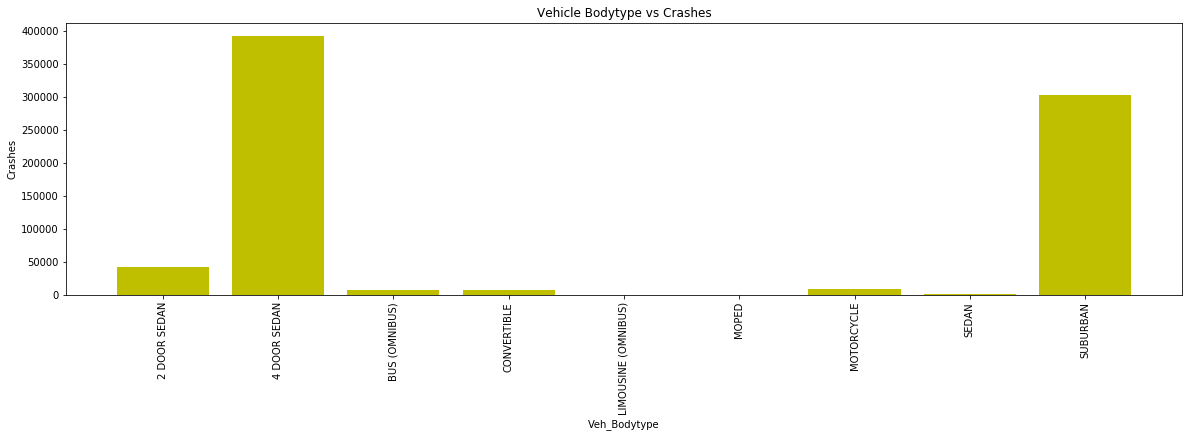

In [76]:
plt.figure(figsize=(20,5))
xaxis = np.arange(len(bodytype1_df))
tick_locations = [value+0.4 for value in xaxis]


yaxis = bodytype1_df["Vehicle Type"]
plt.bar(xaxis,yaxis, color="y", align="edge")

plt.xticks(tick_locations, bodytype1_df["Veh_Bodytype"], rotation="vertical")
plt.title("Vehicle Bodytype vs Crashes")
plt.xlabel("Veh_Bodytype")
plt.ylabel("Crashes")
plt.show()